# Modeling (Linear Regression)

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
from src.config import MASTER_DF_FILE, RANDOM_SEED, SPLIT_SIZE, MAX_ITER, ALPHAS

In [15]:
df = pd.read_csv(MASTER_DF_FILE).drop(columns="Unnamed: 0")
y = df["log_price_sqm"]
X = df.drop(columns=["municipality", "log_price_sqm", "house_price"])

In [16]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=SPLIT_SIZE, random_state=RANDOM_SEED
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

feature_names = scaler.get_feature_names_out()

## LASSO

In [17]:
lasso = LassoCV(alphas=ALPHAS, random_state=RANDOM_SEED, positive=True)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

print(f"R2 score: {lasso.score(X_test_scaled, y_test):.6f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso)}")

R2 score: 0.473999
MSE: 0.1711493695492782


In [18]:
lasso_coefs = lasso.coef_

lasso_coef_df = (
    pd.DataFrame({"feature": feature_names, "coef": lasso_coefs})
      .sort_values("coef", ascending=False)
)

lasso_coef_df[lasso_coef_df["coef"] != 0]

,feature,coef
2,windspeed_mean_kmh,0.121391
21,45 - 49,0.105259
7,sunny_days,0.089895
12,avg_income,0.087224
37,kindergarten,0.078511
8,warm_days,0.071643
3,total_precipitation_mm,0.055962
44,school,0.049081
13,people/km2,0.038737
9,year,0.027889


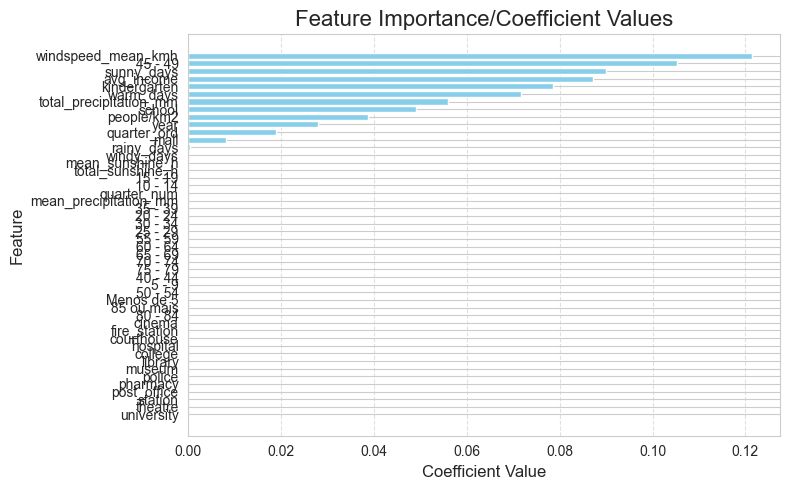

In [19]:
plt.figure(figsize=(8, 5))
plt.barh(lasso_coef_df['feature'], lasso_coef_df['coef'], color='skyblue')
plt.gca().invert_yaxis()

plt.title('Feature Importance/Coefficient Values', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

## RIDGE

In [20]:
ridge = RidgeCV(alphas=ALPHAS)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

print(f"R2 score: {ridge.score(X_test_scaled, y_test):.6f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge)}")

R2 score: 0.586329
MSE: 0.1345998223338361


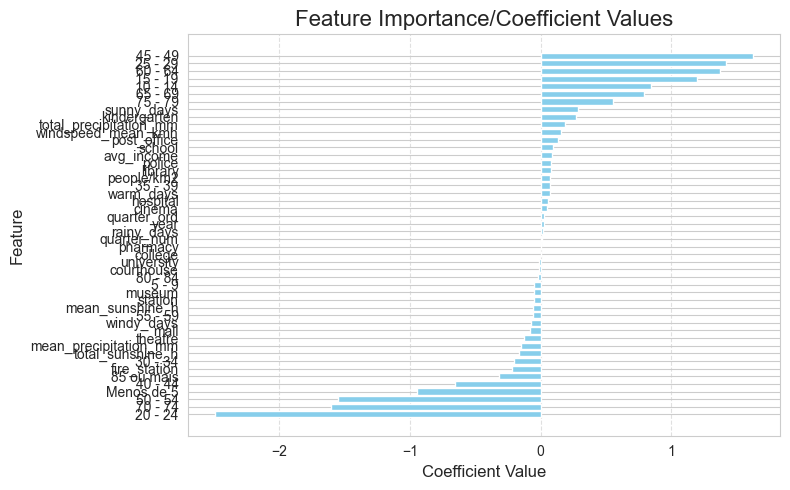

In [21]:
ridge_coefs = ridge.coef_

ridge_coef_df = (
    pd.DataFrame({"feature": feature_names, "coef": ridge_coefs})
      .sort_values("coef", ascending=False)
)

plt.figure(figsize=(8, 5))
plt.barh(ridge_coef_df['feature'], ridge_coef_df['coef'], color='skyblue')
plt.gca().invert_yaxis()

plt.title('Feature Importance/Coefficient Values', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

## ELASTICNET

In [22]:
elastic = ElasticNetCV(alphas=ALPHAS, random_state=RANDOM_SEED)
elastic.fit(X_train_scaled, y_train)

y_pred_elastic = elastic.predict(X_test_scaled)

print(f"R2 score: {elastic.score(X_test_scaled, y_test):.6f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_elastic)}")
elastic.intercept_

R2 score: 0.571708
MSE: 0.13935692464354502


np.float64(6.645491664585703)

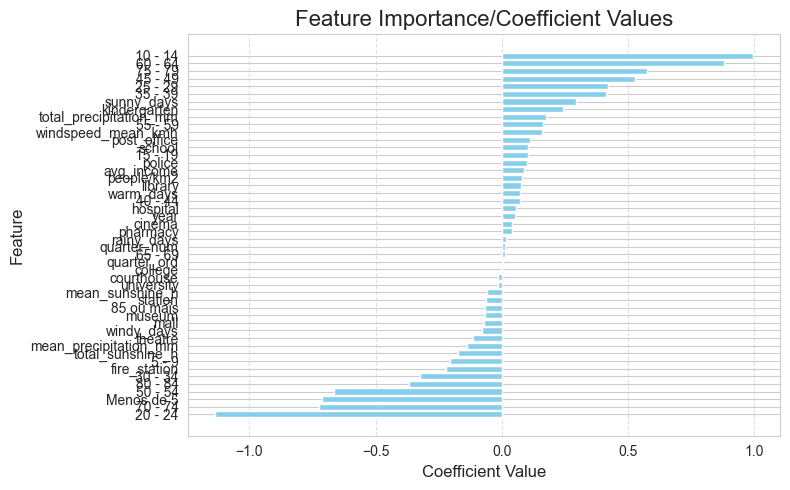

In [23]:
en_coefs = elastic.coef_

elastic_coef_df = (
    pd.DataFrame({"feature": feature_names, "coef": en_coefs})
      .sort_values("coef", ascending=False)
)

plt.figure(figsize=(8, 5))
plt.barh(elastic_coef_df['feature'], elastic_coef_df['coef'], color='skyblue')
plt.gca().invert_yaxis()

plt.title('Feature Importance/Coefficient Values', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()